<a href="https://colab.research.google.com/github/Hatthore/UNIVERSIDAD-QUIMICA-GCOLAB/blob/labFQI/ejercicio_1_labfq1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Datos de entrada
x = np.array([1.985E-04, 1.456E-04, 1.285E-04, 1.149E-04, 4.853E-05, 3.640E-05, 2.427E-05, 1.820E-05])
y = np.array([0.9732, 0.8034, 0.7303, 0.6704, 0.4017, 0.3922, 0.3398, 0.2957])
Sx0x1 = 4.342*10**-6
Sx0x2 = 4.397*10**-6

In [ ]:
# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f'Pendiente (slope): {slope}')
print(f'Intercepto (intercept): {intercept}')
print(f'Coeficiente de determinación (R^2): {r_value**2}')

Pendiente (slope): 3762.7128042265576
Intercepto (intercept): 0.23959207703230428
Coeficiente de determinación (R^2): 0.9968633447198755


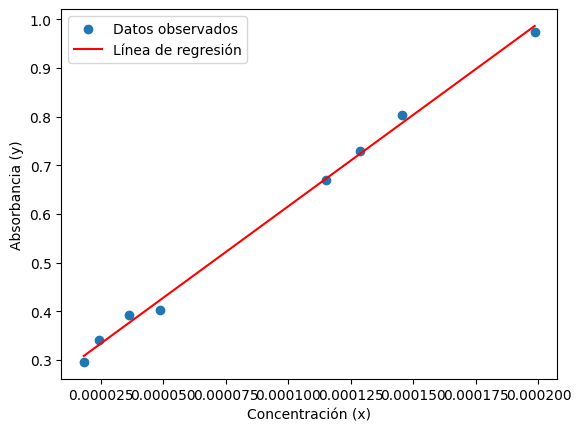

In [ ]:
# Valores predichos
y_pred = slope * x + intercept
# Graficar los datos y la línea de regresión
plt.scatter(x, y, label='Datos observados')
plt.plot(x, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Concentración (x)')
plt.ylabel('Absorbancia (y)')
plt.legend()
plt.show()

In [ ]:
residuals = y - y_pred
std_res = np.std(residuals, ddof=2)

In [ ]:
n = len(x)
alpha = 0.05  # Nivel de confianza del 95%
t_value = stats.t.ppf(1 - alpha / 2, df=n-2)

In [ ]:
def prediction_interval(x_value, slope, intercept, t_value, std_res, x):
    y_pred_value = slope * x_value + intercept
    error = t_value * std_res * np.sqrt(1 + 1/n + (x_value - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    lower_bound = y_pred_value - error
    upper_bound = y_pred_value + error
    return lower_bound, upper_bound

# Ejemplo para calcular el corredor de error para el primer valor de x
x_value = x[0]
lower_bound, upper_bound = prediction_interval(x_value, slope, intercept, t_value, std_res, x)

print(f"Corredor de error para x={x_value}: [{lower_bound}, {upper_bound}]")

Corredor de error para x=0.0001985: [0.9408680609793656, 1.0321130763631863]
